In [20]:
# Reading Australian weather station data with pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("weatherAUS.csv")

In [4]:
# Examining the data set
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

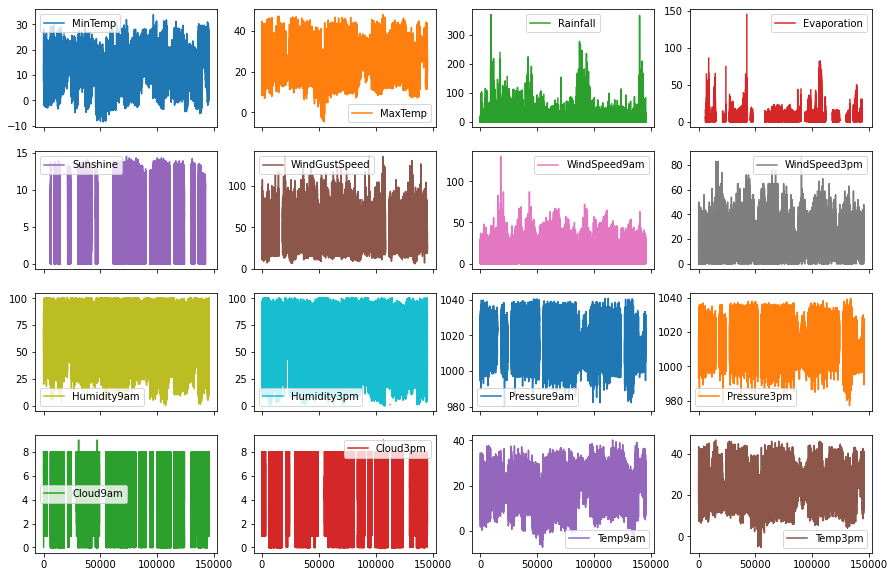

In [12]:
# Checking data set statistics
df.describe().T
df.plot(subplots=True, layout=(4,4), figsize=(15,10))

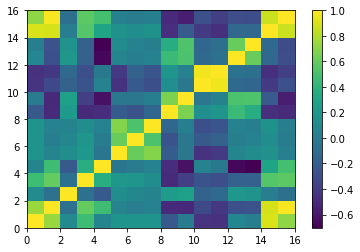

In [14]:
# Correlation between features
df.corr()
f1=plt.figure()
plt.pcolormesh(df.corr())
cbar=plt.colorbar()

In [16]:
# Dropping features and one hot encoding of categorical data
#drop rows with missing "RainTomorrow"
df1=df.dropna(subset=['RainTomorrow'] )
y=df1["RainTomorrow"]
df1 = df1.drop(['Temp3pm', 'Temp9am', 'Date', 'Location','RainTomorrow', 'WindGustDir','WindDir9am'], axis=1)
X1 = pd.get_dummies(df1)

In [17]:
# Binarizing the outcome
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y.astype(str)).ravel() #ravel is opposite of np.newaxis, flattens the array

In [21]:
# Imputing missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X=imp.fit_transform(X1)

In [23]:
# Training the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25)
rf = RandomForestClassifier(n_estimators=200, max_depth=10, criterion='gini')
rf.fit(train_X, train_y)
print("Training score:", rf.score(train_X,train_y))
print("Testing score:", rf.score(test_X, test_y))

Training score: 0.861708112974007
Testing score: 0.8441868969591269


Cross-validation-scores: [0.85447726 0.84753868 0.84725738 0.84500703 0.84602401 0.85024381
 0.84527382 0.84546137 0.84583646 0.84367967]
Mean: 0.8470799486088119
Standard deviation: 0.0029895528617434374
MinTemp 0.021372939958438007
MaxTemp 0.02564108490194169
Rainfall 0.07601367790223815
Evaporation 0.011194140325431864
Sunshine 0.0792778354336
WindGustSpeed 0.05924907680802255
WindSpeed9am 0.009934149772078443
WindSpeed3pm 0.013343122428207104
Humidity9am 0.05138662642009025
Humidity3pm 0.3200157420550665
Pressure9am 0.04436175790677677
Pressure3pm 0.055175247379340576
Cloud9am 0.023459805556470745
Cloud3pm 0.0713298532669603
WindDir3pm_E 0.0005569118071072507
WindDir3pm_ENE 0.0006046988058171384
WindDir3pm_ESE 0.0006280375219717054
WindDir3pm_N 0.001911372352082519
WindDir3pm_NE 0.0012333165407021856
WindDir3pm_NNE 0.0013205823948147068
WindDir3pm_NNW 0.0017913623854860076
WindDir3pm_NW 0.001420758255952369
WindDir3pm_S 0.0012356342658070944
WindDir3pm_SE 0.0007320252752366121
Wind

<BarContainer object of 32 artists>

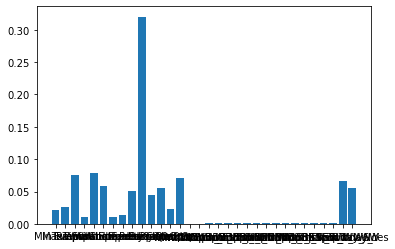

In [24]:
# Cross-validating the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, train_X, train_y, cv=10)
print("Cross-validation-scores:", scores )
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())
for i in range(np.shape(X)[1]):
    print(X1.columns[i], rf.feature_importances_[i])
plt.bar(X1.columns,rf.feature_importances_)

In [27]:
# Removing features
train_X=pd.DataFrame(data=train_X, columns=X1.columns)
train_Xr=train_X.drop(train_X.columns[14:30],axis=1)
train_Xr.drop(['Pressure9am'], axis=1, inplace=True)
test_X=pd.DataFrame(data=test_X, columns=X1.columns)
test_Xr=test_X.drop(test_X.columns[14:30],axis=1)
test_Xr.drop(['Pressure9am'], axis=1, inplace=True)

Training score: 0.8642117700011253
Testing score: 0.845874708149315
Cross-validation-scores: [0.83881857 0.8419128  0.85203938 0.83994374 0.8419128  0.85513361
 0.84585091 0.8371308  0.84697609 0.83764772]
Mean: 0.8437366426925703
Standard deviation: 0.0058286284913598285


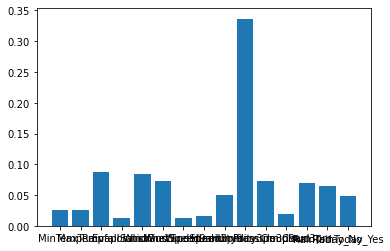

In [28]:
# Training and testing reduced model
rf.fit(train_Xr,train_y)
print("Training score:", rf.score(train_Xr,train_y))
print("Testing score:", rf.score(test_Xr, test_y))
plt.bar(test_Xr.columns,rf.feature_importances_)
scores = cross_val_score(rf, test_Xr, test_y, cv=10)
print("Cross-validation-scores:", scores )
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

In [29]:
# Obtaining confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(test_Xr)
confusion_matrix(test_y,y_pred)

array([[26421,  1093],
       [ 4386,  3649]])

In [31]:
# Using weights for outcome classes
rf = RandomForestClassifier(n_estimators=300, max_depth=15,class_weight="balanced",criterion='gini')
rf.fit(train_Xr,train_y)
print("Training score:", rf.score(train_Xr,train_y))
print("Testing score:", rf.score(test_Xr, test_y))
y_pred=rf.predict(test_Xr)
confusion_matrix(test_y,y_pred)

Training score: 0.9178294137504219
Testing score: 0.8347914146670793


array([[24325,  3189],
       [ 2684,  5351]])

In [32]:
# Fitting support vector machines
from sklearn import svm
sv=svm.SVC()
sv.fit(train_Xr,train_y)
print("Testing score:", sv.score(test_Xr, test_y))

Testing score: 0.8365073560437706


In [33]:
# Fitting support vector machines DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_Xr,train_y)
print("Training score:", dt.score(train_Xr,train_y))
print("Testing score:", dt.score(test_Xr, test_y))
y_pred=dt.predict(test_Xr)
confusion_matrix(test_y,y_pred)

Training score: 0.9999624920295562
Testing score: 0.7805564150890321


array([[23448,  4066],
       [ 3735,  4300]])

Training score: 0.8501650350699523
Testing score: 0.8459872288953276


<BarContainer object of 15 artists>

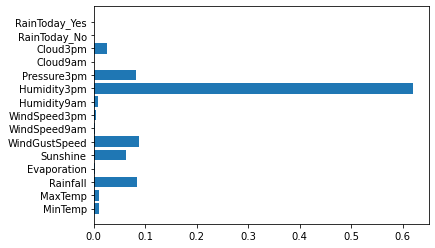

In [34]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(train_Xr,train_y)
print("Training score:", gb.score(train_Xr,train_y))
print("Testing score:", gb.score(test_Xr, test_y))
y_pred=gb.predict(test_Xr)
confusion_matrix(test_y,y_pred)
plt.barh(test_Xr.columns,gb.feature_importances_)

Training score: 0.8492273358088593
Testing score: 0.8448901516217052


<BarContainer object of 8 artists>

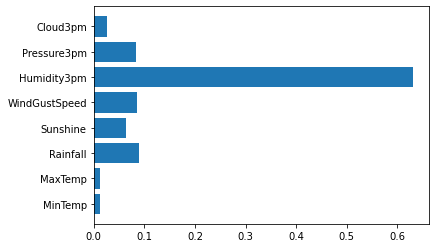

In [35]:
# Reduced Gradient Boosting
todrop=["Evaporation","RainToday_Yes","RainToday_No", "Cloud9am","WindSpeed3pm","WindSpeed9am", "Humidity9am"]
X2=train_Xr.drop(todrop,axis=1)
gb.fit(X2,train_y)
print("Training score:", gb.score(X2,train_y))
test_X2=test_Xr.drop(todrop,axis=1)
print("Testing score:", gb.score(test_X2,test_y))
y_pred=gb.predict(test_X2)
confusion_matrix(test_y,y_pred)
plt.barh(test_X2.columns,gb.feature_importances_)

All ”good” methods produce test scores around 85. It is likely that this is maximum one can achieve with selected set of features. For further gains, one would need to include additional predictive information, perhaps time, spatial location or data from previous day. Among best performing methods: Random Forest allows to specify weights for the outcomes, Gradient boost was excellent at revealing irrelevant features